# Time Series Forecasting using Auto ARIMA and Prophet
<br>
This repo contains the Time Series Forecasting using Auto ARIMA and Prophet project as part of my data science portfolio. The objective is to forecast international airline passengers using a dataset from Kaggle. 



1. [Problem Statement](#problem)
2. [Dataset](#data)
3. [Exploratory Data Analysis](#eda)
4. [Auto ARIMA](#arima)
5. [Prophet](#pro)
6. [Discussion and Conclusion](#conclusion)

# <a name="problem">Problem Statement</a>
This project is implemented to explore different time series modelling techniques on a relatively simple and clean dataset. The dataset contains 12 years of international airline passengers from 1941 to 1960. The data will be split into training (1949-1957) and validation (1958-1960) sets according to the ratio of 75:25. The training set (9 years) will be used to forecast for 3 years ahead and then compare with the actual validation data. Errors will be calculated in terms of Root Mean Square Error (RMSE).

# <a name="data">Dataset</a>

The dataset used in this project is [International airline passengers](https://www.kaggle.com/andreazzini/international-airline-passengers) downloaded from [Kaggle](https://www.kaggle.com/andreazzini/international-airline-passengers). It contains monthly total number of passengers (in thousands) and has two columns – month and count of passengers.

# <a name="eda">Exploratory Data Analysis</a>

To explore the trend and seasonality of the data.

In [1]:
# import packages
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from fbprophet import Prophet

# for calculation
from math import sqrt
from sklearn.metrics import mean_squared_error

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
colnames=["month", "passengers"] 
df = pd.read_csv("international-airline-passengers.csv", nrows=144, names=colnames, header=0)

In [3]:
# view the data
print(df.shape)
df.head()

(144, 2)


,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# set index as Date
df["month"] = pd.to_datetime(df["month"])
df = df.set_index("month")
df.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
# statistics
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# group the passengers by year
df.groupby(df.index.year).sum()

,passengers
month,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


In [8]:
# group the passengers by year
df.groupby(df.index.year).count()

,passengers
month,
1949,12
1950,12
1951,12
1952,12
1953,12
1954,12
1955,12
1956,12
1957,12


In [9]:
# calculate where to split the data
len(df[(df.index.year <= 1957)]), len(df[(df.index.year > 1957)])

(108, 36)

In [10]:
# splitting into train and validation
train = df[:108]
valid = df[108:]

In [11]:
train.shape, valid.shape

((108, 1), (36, 1))

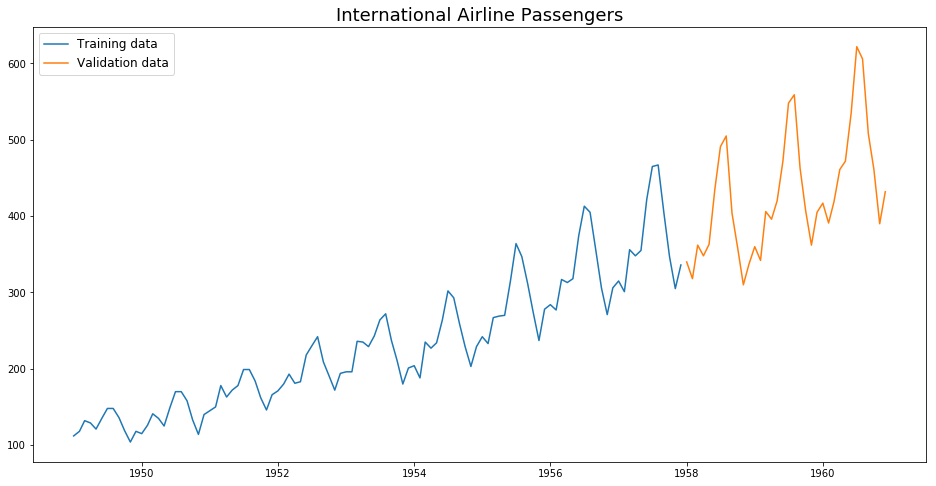

In [12]:
# plot the graph
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("International Airline Passengers", fontsize=18)
plt.plot(train.index, train["passengers"], label="Training data")
plt.plot(valid.index, valid["passengers"], label="Validation data")
plt.legend(prop={"size": 12})
plt.savefig("passengers.png", bbox_inches="tight")
plt.show()

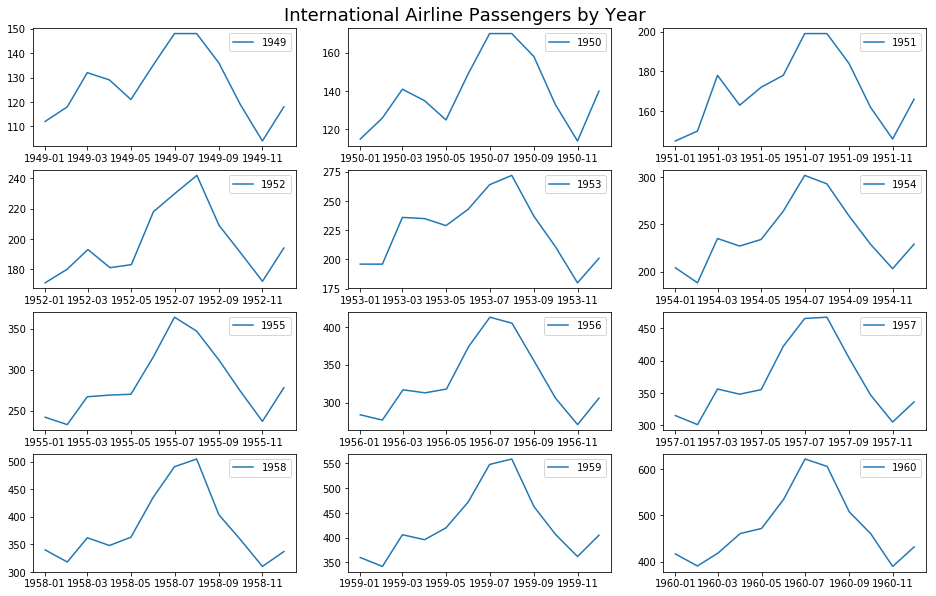

In [13]:
# plot monthly data for seasonality

plt.subplots(figsize=(16,10))

plt.suptitle("International Airline Passengers by Year", fontsize=18, x=0.5, y=.91)

plt.subplot(431)
plt.plot(df.index[:12], df["passengers"][:12])
plt.legend(["1949"])

plt.subplot(432)
plt.plot(df.index[12:24], df["passengers"][12:24])
plt.legend(["1950"])

plt.subplot(433)
plt.plot(df.index[24:36], df["passengers"][24:36])
plt.legend(["1951"])

plt.subplot(434)
plt.plot(df.index[36:48], df["passengers"][36:48])
plt.legend(["1952"])

plt.subplot(435)
plt.plot(df.index[48:60], df["passengers"][48:60])
plt.legend(["1953"])

plt.subplot(436)
plt.plot(df.index[60:72], df["passengers"][60:72])
plt.legend(["1954"])

plt.subplot(437)
plt.plot(df.index[72:84], df["passengers"][72:84])
plt.legend(["1955"])

plt.subplot(438)
plt.plot(df.index[84:96], df["passengers"][84:96])
plt.legend(["1956"])

plt.subplot(439)
plt.plot(df.index[96:108], df["passengers"][96:108])
plt.legend(["1957"])

plt.subplot(4,3,10)
plt.plot(df.index[108:120], df["passengers"][108:120])
plt.legend(["1958"])

plt.subplot(4,3,11)
plt.plot(df.index[120:132], df["passengers"][120:132])
plt.legend(["1959"])

plt.subplot(4,3,12)
plt.plot(df.index[132:144], df["passengers"][132:144])
plt.legend(["1960"])

plt.savefig("by_year.png", bbox_inches="tight")
plt.show()

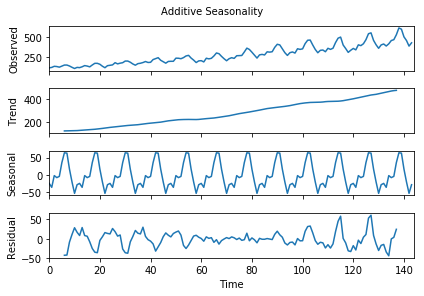

In [14]:
# Additive Seasonality

add_seasonality = sm.tsa.seasonal_decompose(df.values,freq=12,model="additive")
fig = add_seasonality.plot()
fig.text(0.5, 0.99, "Additive Seasonality", ha="center")
plt.savefig("additive_seasonality.png", bbox_inches="tight")
plt.show()

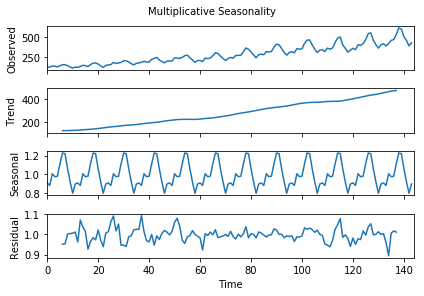

In [15]:
# Multiplicative Seasonality

mul_seasonality = sm.tsa.seasonal_decompose(df.values,freq=12,model="multiplicative")
fig = mul_seasonality.plot()
fig.text(0.5, 0.99, "Multiplicative Seasonality", ha="center")
plt.savefig("multiplicative_seasonality.png", bbox_inches="tight")
plt.show()

---
# <a name="arima">Auto ARIMA</a>

Auto Regressive Integrated Moving Average (ARIMA) is a popular statistical method for time series forecasting. ARIMA model uses past data to understand the pattern in the time series. It takes into account the past values to predict the future values. While ARIMA is a powerful forecasting model, the data preparation and parameter (p,q,d) tuning processes can be time-consuming. We need to choose p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component. There are many ways to choose these values statistically, such as looking at auto-correlation plots, correlation plots, domain experience, etc.

One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

The pmd-arima library for Python allows us to quickly perform this grid search and even creates a model object that you can fit to the training data. This library contains an auto_arima function that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value.

In [16]:
# fit the model
%time
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Wall time: 0 ns
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=959.218, BIC=975.255, Fit time=0.419 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1002.826, BIC=1008.172, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=996.373, BIC=1004.392, Fit time=0.056 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=991.646, BIC=999.664, Fit time=0.098 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=971.486, BIC=984.850, Fit time=0.280 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=966.590, BIC=985.300, Fit time=0.492 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=969.040, BIC=982.405, Fit time=0.347 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=988.670, BIC=999.361, Fit time=0.125 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [17]:
# make predictions
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast ,index = valid.index, columns=['prediction'])

In [18]:
print(forecast.shape, valid.shape)
forecast.head()

(36, 1) (36, 1)


,prediction
month,
1958-01-01,359.731686
1958-02-01,368.702930
1958-03-01,403.143226
1958-04-01,420.828169
1958-05-01,443.334372


In [19]:
# calculate rmse
rms_arima = sqrt(mean_squared_error(valid, forecast))
print("RMSE for Auto ARIMA = {}".format(rms_arima))

RMSE for Auto ARIMA = 62.100975859017254


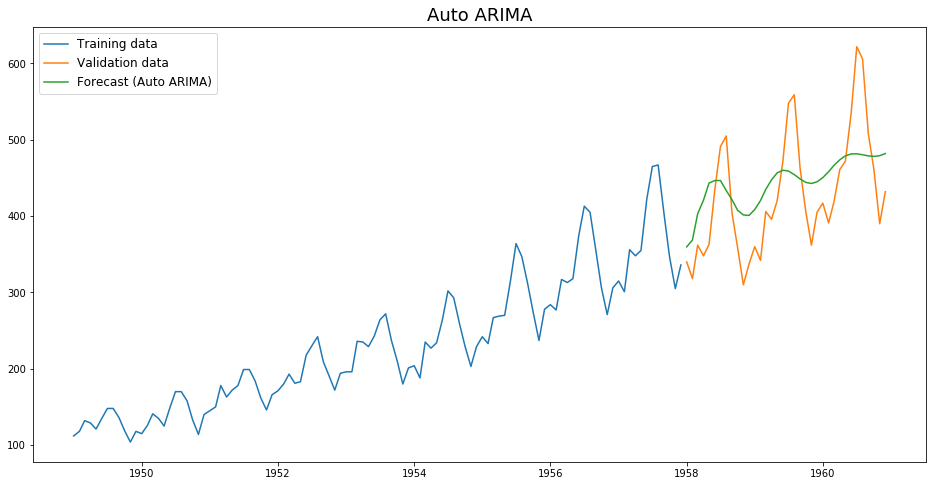

In [20]:
# plot the result
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("Auto ARIMA", fontsize=18)
plt.plot(train.index, train["passengers"], label="Training data")
plt.plot(valid.index, valid["passengers"], label="Validation data")
plt.plot(forecast.index, forecast["prediction"], label="Forecast (Auto ARIMA)")
plt.legend(prop={"size": 12})
plt.savefig("auto_arima.png", bbox_inches="tight")
plt.show()

---
# <a name="pro">Prophet</a>

Prophet is open source software released by Facebook’s Core Data Science team. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. 

### Additive Seasonality

In [21]:
# splitting into train and validation
train = df[:108]
valid = df[108:]

In [22]:
pd.options.mode.chained_assignment = None

train["ds"] = train.index
train[ "y"] = train.passengers
train.drop(["passengers"],axis = 1, inplace = True)

In [23]:
# fit the model
model = Prophet(seasonality_mode="additive")
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\limchiahooi\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


**Note:** We can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Therefore, when fitting Prophet to monthly data, we will only make monthly forecasts, which can be done by passing the frequency into make_future_dataframe.

In [24]:
# make predictions
future = model.make_future_dataframe(periods=len(valid), freq="M")
forecast = model.predict(future)

In [25]:
# get the forecast values
forecast_valid = forecast["yhat"][108:]

In [26]:
forecast_valid.shape, valid.shape

((36,), (36, 1))

In [27]:
# insert prediction values into validation set
valid.insert(loc=1, column="prediction", value=forecast_valid.values)

In [28]:
print(valid.shape)
valid.head()

(36, 2)


,passengers,prediction
month,,
1958-01-01,340,364.624304
1958-02-01,318,368.493451
1958-03-01,362,399.689278
1958-04-01,348,400.118178
1958-05-01,363,408.957595


In [29]:
# calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid["passengers"])-np.array(forecast_valid)),2)))
rms

46.54863578128015

In [30]:
# calculate rmse
rms_prophet_as = sqrt(mean_squared_error(valid["passengers"], forecast_valid))
print("RMSE for Prophet = {}".format(rms_prophet_as))

RMSE for Prophet = 46.54863578128015


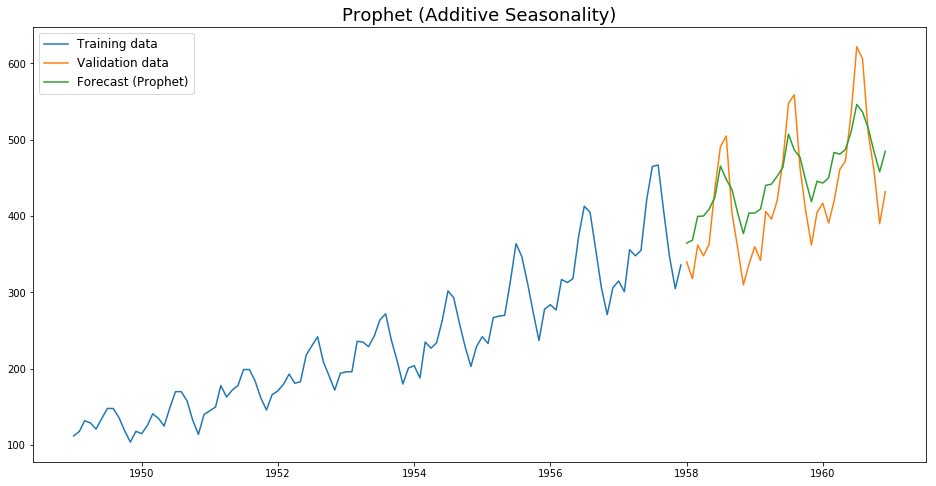

In [31]:
# plot the result
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("Prophet (Additive Seasonality)", fontsize=18)
plt.plot(train.index, train["y"], label="Training data")
plt.plot(valid.index, valid["passengers"], label="Validation data")
plt.plot(valid.index, valid["prediction"], label="Forecast (Prophet)")
plt.legend(prop={"size": 12})
plt.savefig("prophet_as.png", bbox_inches="tight")
plt.show()

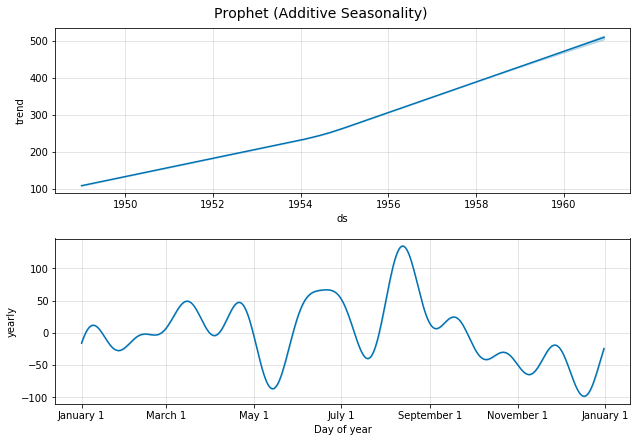

In [32]:
# plot the components
fig_components = model.plot_components(forecast)
fig_components.text(0.5, 0.99, "Prophet (Additive Seasonality)", ha="center", fontsize=14)
plt.savefig("components_as.png", bbox_inches="tight")

### Multiplicative Seasonality

This time series of the number of air passengers is an example of when additive seasonality does not work. This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality. Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the input arguments.


In [33]:
# splitting into train and validation
train = df[:108]
valid = df[108:]

pd.options.mode.chained_assignment = None

train["ds"] = train.index
train[ "y"] = train.passengers
train.drop(["passengers"], axis = 1, inplace = True)

In [34]:
# fit the model
model = Prophet(seasonality_mode="multiplicative")
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\limchiahooi\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [35]:
# make predictions
future = model.make_future_dataframe(periods=len(valid), freq="M")
forecast = model.predict(future)

In [36]:
# get the forecast values
forecast_valid = forecast["yhat"][108:]

In [37]:
# insert prediction values into validation set
valid.insert(loc=1, column="prediction", value=forecast_valid.values)

In [38]:
# calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid["passengers"])-np.array(forecast_valid)),2)))
rms

34.88816744542935

In [39]:
# calculate rmse
rms_prophet_ms = sqrt(mean_squared_error(valid["passengers"], forecast_valid))
print("RMSE for Prophet = {}".format(rms_prophet_ms))

RMSE for Prophet = 34.88816744542935


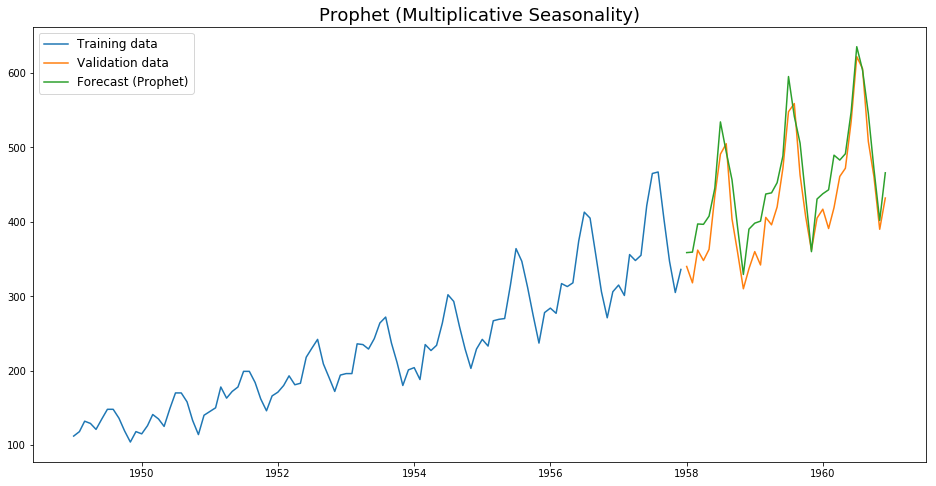

In [40]:
# plot the result
plt.figure(figsize=(16,8))
# plt.xlabel("Date")
# plt.ylabel("Passengers")
plt.title("Prophet (Multiplicative Seasonality)", fontsize=18)
plt.plot(train.index, train["y"], label="Training data")
plt.plot(valid.index, valid["passengers"], label="Validation data")
plt.plot(valid.index, valid["prediction"], label="Forecast (Prophet)")
plt.legend(prop={"size": 12})
plt.savefig("prophet_ms.png", bbox_inches="tight")
plt.show()

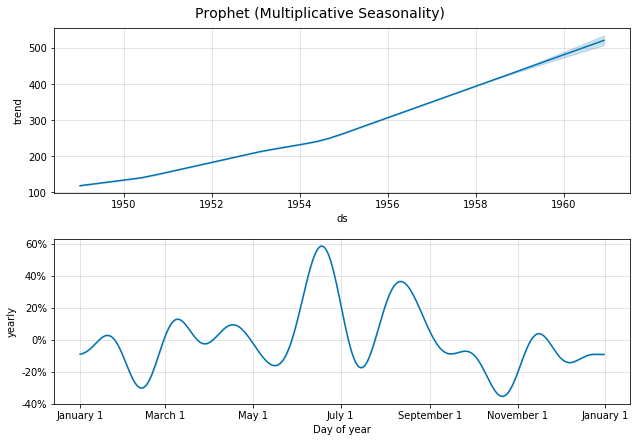

In [41]:
# plot the components
fig_components = model.plot_components(forecast)
fig_components.text(0.5, 0.99, "Prophet (Multiplicative Seasonality)", ha="center", fontsize=14)
plt.savefig("components_ms.png", bbox_inches="tight")

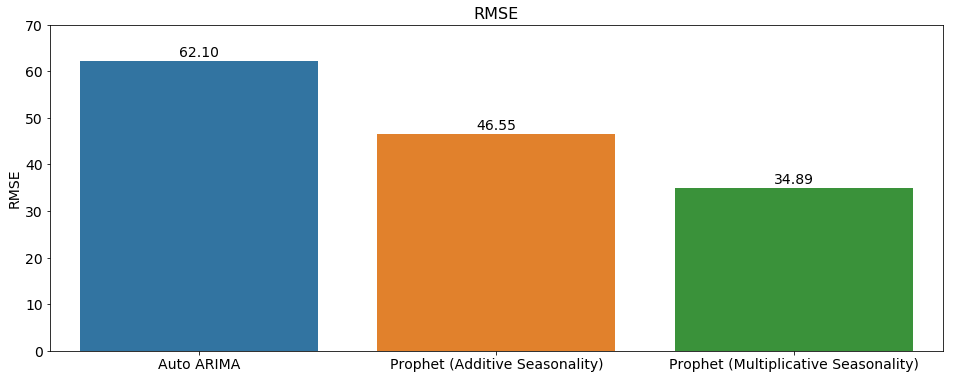

In [42]:
# combine all models' results into one dataframe
data = {"Model": ["Auto ARIMA", "Prophet (Additive Seasonality)", "Prophet (Multiplicative Seasonality)"], 
        "RMSE": [rms_arima, rms_prophet_as, rms_prophet_ms]}

results = pd.DataFrame(data=data)
results

# plot the results
plt.figure(figsize=(16, 6))

plt.title("RMSE", fontsize=16)
g1 = sns.barplot(x="Model", y="RMSE", data=results)
plt.ylim(0, 70)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
g1.set_ylabel("RMSE", fontsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+1, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.savefig("rmse.png", bbox_inches="tight")
plt.show()

***
# <a name="conclusion">Discussion and Conclusion</a> #
Comparing the time series models, Prophet performed significantly better than Auto ARIMA in forecasting the International airline passengers with the lowest RMSE. There is a clear seasonality pattern with a spike in the middle of the year (Jun-July) and Prophet has succesfully captured this pattern as seen in the component graph. However, this seasonality is not a constant additive factor, rather it grows with the trend i.e. multiplicative seasonality. Prophet can model multiplicative seasonality and thus produce impressive results in this dataset. 

If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

---
### References
- https://www.kaggle.com/andreazzini/international-airline-passengers
- https://facebook.github.io/prophet/docs/non-daily_data.html
- https://facebook.github.io/prophet/docs/multiplicative_seasonality.html
- http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
- https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c